# Airbnb-New York
#### Context Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present more unique, personalized way of experiencing the world. This dataset describes the listing activity and metrics in NYC, NY for 2019.

#### Content This data file includes all needed information to find out more about hosts, geographical availability, necessary metrics to make predictions and draw conclusions.

#### Task: To predict the price

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline 
sns.set(color_codes=True)

from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

C:\Users\GCS\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#Importing the dataset
df = pd.read_csv("D:/AppliedAICourse/Projects/Machine Learning/AirBNB -Price Prediction/Airbnb_NYC_2019.csv")
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
df.shape

(48895, 16)

# Exploratory Data Analysis 

In [4]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [5]:
#statistical summary of numeric columns
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


EDA using Pandas Profiling 

In [6]:
#from pandas_profiling import ProfileReport
#report = ProfileReport(df,title="Pandas_Profiling",explorative=True)
#report.to_file("D:/AppliedAICourse/Projects/Machine Learning/AirBNB -Price Prediction/EDA.html")

I Commented above code since I dont want to run it Every time

# Missing Value Treatment

Dataset consist of some null values in name, host_name, last_review, reviews_per_month column

-->id and host_name have nothing to do with our analysis --> columns "last_review" and "review_per_month" need very simple handling. To elaborate, "last_review" is date; if there were no reviews for the listing - date simply will not exist

In [7]:
# let me drop some unnecassary features
df.drop(['id', 'name','host_name','last_review'], axis=1, inplace=True)
df.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


For "reviews_per_month" column, i will replace the null value with the mean

In [8]:
#replacing all NaN values in 'reviews_per_month' with mean i.e 1.37
df.fillna({'reviews_per_month':1.37}, inplace=True)
#examing changes
df.reviews_per_month.isnull().sum()

0

# Outlier Detection

An outlier is an observation that lies an abnormal distance from other values in a random sample from a population. This will affect the model accuracy and overall performance!!

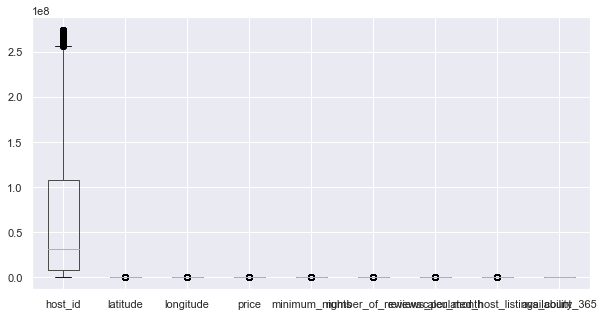

In [9]:
df.boxplot(figsize=(10,5))

By using the box plot, one can easily detect the presence of outlier:

The lower whisker is the 25th percentile and the upper whisker is 75th percentile.
All the values below 25th percentile and above 75th percentile are outliers

In [10]:
print(df['host_id'].quantile(0.25))
print(df['host_id'].quantile(0.75))

7822033.0
107434423.0


In [11]:
df["host_id"] = np.where(df["host_id"] < 7822033.0, 7822033.0,df['host_id'])
df["host_id"] = np.where(df["host_id"] > 107434423.0, 107434423.0,df['host_id'])

In [12]:
print(df['latitude'].quantile(0.25))
print(df['latitude'].quantile(0.75))

40.6901
40.763115


In [13]:
df["latitude"] = np.where(df["latitude"] <40.6901, 40.6901,df['latitude'])
df["latitude"] = np.where(df["latitude"] >40.763115, 40.763115,df['latitude'])


In [14]:
print(df['longitude'].quantile(0.25))
print(df['longitude'].quantile(0.75))

-73.98307
-73.936275


In [15]:
df["longitude"] = np.where(df["longitude"] <-73.98307, -73.98307,df['longitude'])
df["longitude"] = np.where(df["longitude"] >-73.936275, -73.936275,df['longitude'])


In [16]:
print(df['price'].quantile(0.25))
print(df['price'].quantile(0.75))

69.0
175.0


In [17]:
df["price"] = np.where(df["price"] <69.0, 69.0,df['price'])
df["price"] = np.where(df["price"] >175.0, 175.0,df['price'])


In [18]:

print(df['minimum_nights'].quantile(0.25))
print(df['minimum_nights'].quantile(0.75))

1.0
5.0


In [19]:
df["minimum_nights"] = np.where(df["minimum_nights"] <69.0, 69.0,df['minimum_nights'])
df["minimum_nights"] = np.where(df["minimum_nights"] >175.0, 175.0,df['minimum_nights'])

In [20]:
print(df['number_of_reviews'].quantile(0.25))
print(df['number_of_reviews'].quantile(0.75))

1.0
24.0


In [21]:
df["number_of_reviews"] = np.where(df["number_of_reviews"] <1.0, 1.0,df['number_of_reviews'])
df["number_of_reviews"] = np.where(df["number_of_reviews"] >24.0, 24.0,df['number_of_reviews'])


In [22]:

print(df['reviews_per_month'].quantile(0.25))
print(df['reviews_per_month'].quantile(0.75))


0.28
1.58


In [23]:
df["reviews_per_month"] = np.where(df["reviews_per_month"] <0.28, 0.28,df['reviews_per_month'])
df["reviews_per_month"] = np.where(df["reviews_per_month"] >1.58, 1.58,df['reviews_per_month'])


In [24]:

print(df['calculated_host_listings_count'].quantile(0.25))
print(df['calculated_host_listings_count'].quantile(0.75))

1.0
2.0


In [25]:
df["calculated_host_listings_count"] = np.where(df["calculated_host_listings_count"] <0.28, 0.28,df['calculated_host_listings_count'])
df["calculated_host_listings_count"] = np.where(df["calculated_host_listings_count"] >1.58, 1.58,df['calculated_host_listings_count'])


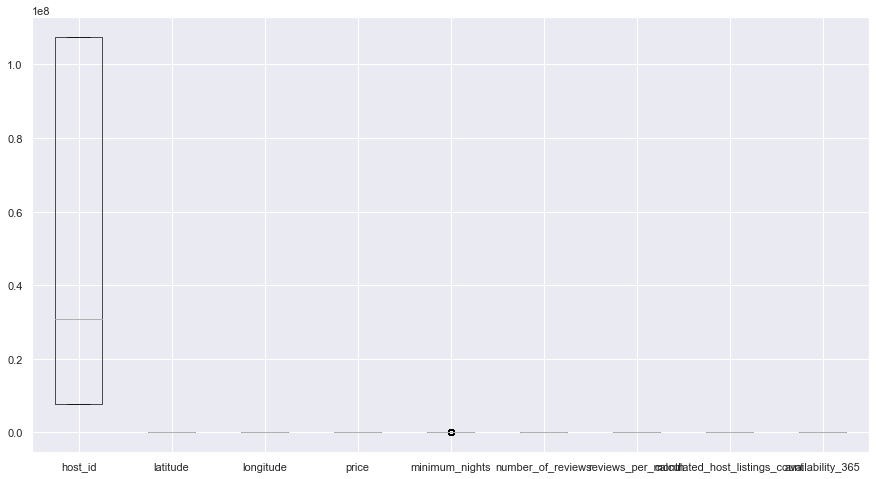

In [26]:
df.boxplot(figsize=(15,8))

In [27]:
df.head(2)

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,7822033.0,Brooklyn,Kensington,40.69010,-73.97237,Private room,149.0,69.0,9.0,0.28,1.58,365
1,7822033.0,Manhattan,Midtown,40.75362,-73.98307,Entire home/apt,175.0,69.0,24.0,0.38,1.58,355


In [28]:
df.shape

(48895, 12)

# Data Analysis

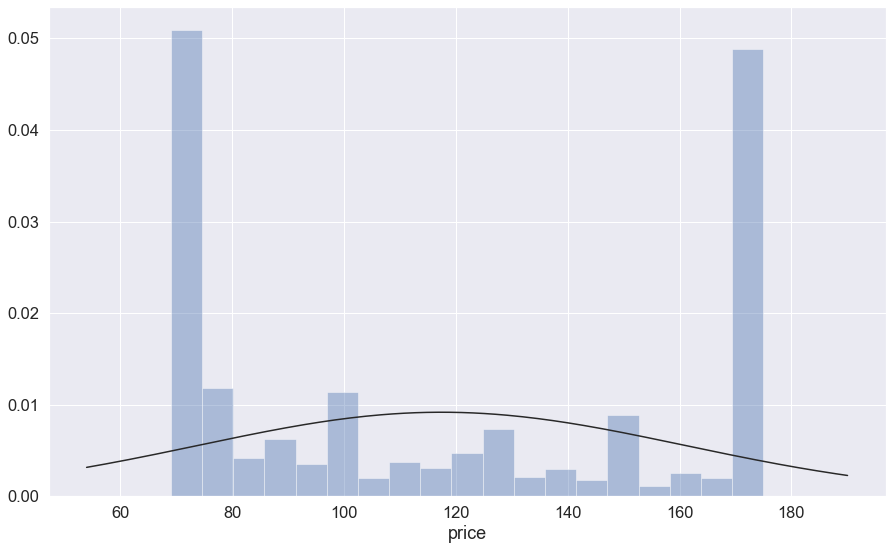

In [29]:
#Price range
sns.set(font_scale=1.5) 
from scipy.stats import norm
fig, ax = plt.subplots(figsize=(15, 9))
sns.distplot(a=df.price, kde=False, fit=norm)

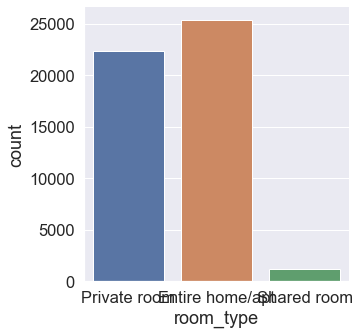

In [30]:
#Preferred room type

sns.catplot(x="room_type", kind="count", data=df);

By seeing the above bar graph, it is clear that entire home or apartment is most preferred room type. Shared room is least one,

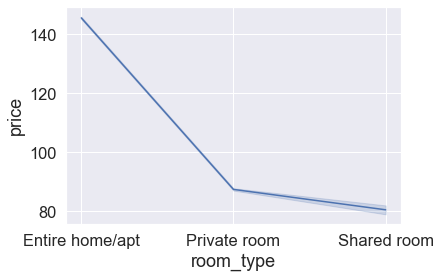

In [31]:
#Does price affect the preffered room type
sns.lineplot(x="room_type", y="price", data=df)


As per the above plot, shared room is least preffered even after low cost. The reason might be due to privacy concerns, cleanliness or individual choice.

I will create the bins of price into Low, Medium, High

In [32]:
df["price"] = df["price"].astype(int,copy=True)

Text(0.5, 1.0, 'PRICE BINS')

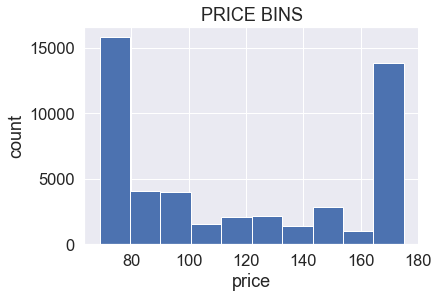

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(df["price"])
plt.xlabel("price")
plt.ylabel("count")
plt.title("PRICE BINS")

In [34]:
bins = np.linspace(min(df["price"]),max(df["price"]),4)
bins

array([ 69.        , 104.33333333, 139.66666667, 175.        ])

In [35]:
group_names = ['Low', 'Medium', 'High']

In [36]:
df['price_binned'] = pd.cut(df['price'], bins, labels=group_names ,include_lowest = True)
df[['price','price_binned']].head(20)

,price,price_binned
0,149,High
1,175,High
2,150,High
3,89,Low
4,80,Low
5,175,High
6,69,Low
7,79,Low
8,79,Low
9,150,High


In [37]:
df["price_binned"].value_counts()


Low       24112
High      18362
Medium     6421
Name: price_binned, dtype: int64

Text(0.5, 1.0, 'price bins')

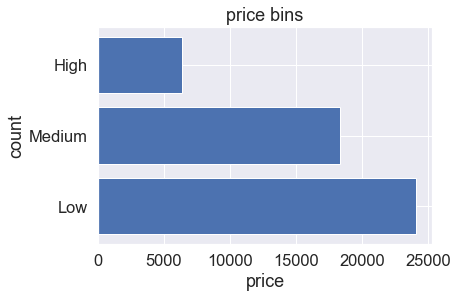

In [38]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
pyplot.barh(group_names, df["price_binned"].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("price")
plt.pyplot.ylabel("count")
plt.pyplot.title("price bins")

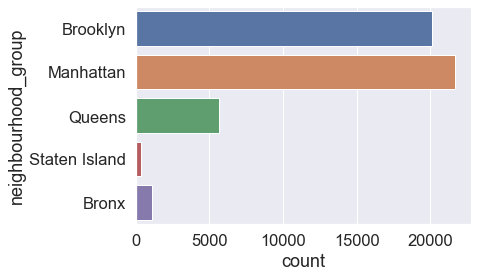

In [39]:
#Which neighbourhood group has maximum counts?
sns.countplot(y='neighbourhood_group',data=df)

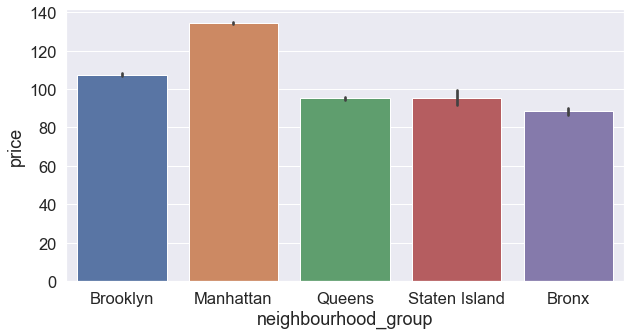

In [40]:
#Does price affect the neighbourhood 
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
sns.barplot(x='neighbourhood_group', y="price", data=df)

Again Price is not the Factor

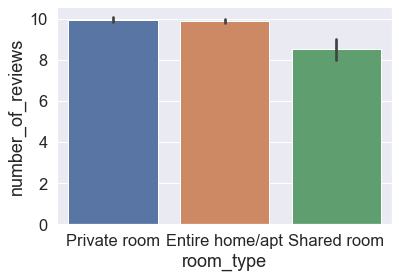

In [41]:
#Does reviews affect the room_type
sns.barplot(x='room_type', y="number_of_reviews", data=df)

So now it is clear that entire home and private room has good reviews, this might be the possible reason for individuals to prefer entire and private room over shared room

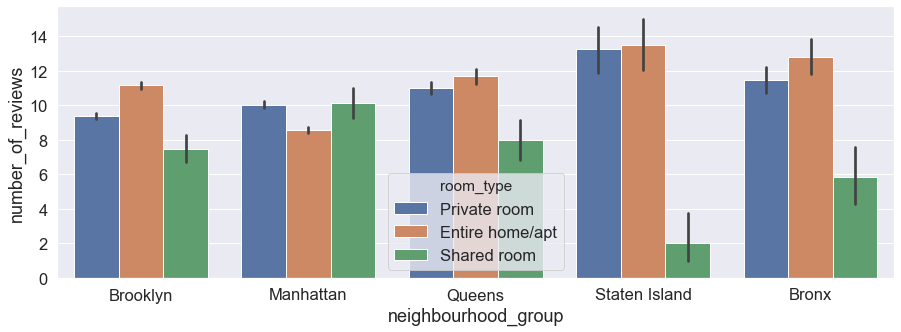

In [42]:
#Does reviews affect the room_type.
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
sns.barplot(x='neighbourhood_group', y="number_of_reviews", hue = 'room_type', data=df)

Even though the staten island has high reviews its not preffered

# Treating Categorical Data
I have used Label encoder from sklearn, it will convert all the categorical data to numeric

In [46]:
le = preprocessing.LabelEncoder()

df.room_type = le.fit_transform(df.room_type)
df.neighbourhood_group = le.fit_transform(df.neighbourhood_group)
df.neighbourhood = le.fit_transform(df.neighbourhood)
df.price_binned = le.fit_transform(df.price_binned)
df.head(20)

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price_binned
0,7822033.0,1,108,40.690100,-73.97237,1,149,69.0,9.0,0.28,1.58,365,0
1,7822033.0,2,127,40.753620,-73.98307,0,175,69.0,24.0,0.38,1.58,355,0
2,7822033.0,2,94,40.763115,-73.94190,1,150,69.0,1.0,1.37,1.00,365,0
3,7822033.0,1,41,40.690100,-73.95976,0,89,69.0,24.0,1.58,1.00,194,1
4,7822033.0,2,61,40.763115,-73.94399,0,80,69.0,9.0,0.28,1.00,0,1
5,7822033.0,2,137,40.747670,-73.97500,0,175,69.0,24.0,0.59,1.00,129,0
6,7822033.0,1,13,40.690100,-73.95596,1,69,69.0,24.0,0.40,1.00,0,1
7,7822033.0,2,95,40.763115,-73.98307,1,79,69.0,24.0,1.58,1.00,220,1
8,7822033.0,2,202,40.763115,-73.96723,1,79,69.0,24.0,0.99,1.00,0,1
9,7822033.0,2,35,40.713440,-73.98307,0,150,69.0,24.0,1.33,1.58,188,0


# Model Selection


In [47]:

from scipy import stats
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesClassifier

In [48]:
X = df.drop(['price', 'price_binned'], axis =1)
y = df['price']

First, Standard Scaler technique will be used to normalize the data set. Thus, each feature has 0 mean and 1 standard deviation.

In [53]:
scaler = StandardScaler()
x = scaler.fit_transform(X)

Spliting the data in test and train

In [55]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

In [56]:
X_train.shape

(34226, 11)

In [57]:
X_test.shape

(14669, 11)

Feature selection


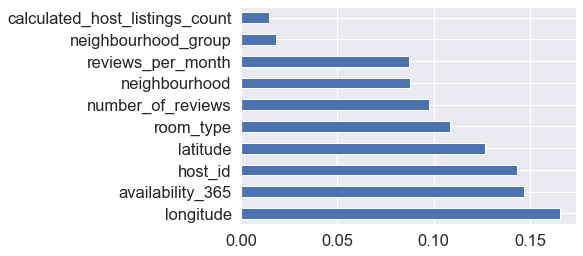

In [58]:

lab_enc = preprocessing.LabelEncoder()

feature_model = ExtraTreesClassifier(n_estimators=50)
feature_model.fit(X_train,lab_enc.fit_transform(y_train))

feat_importances = pd.Series(feature_model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

# Linear Regression

In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
from sklearn.metrics import r2_score

reg = LinearRegression(n_jobs = 10, normalize = True)
reg.fit(X_train,y_train)

LinearRegression(n_jobs=10, normalize=True)

In [60]:
reg.score(X_train, y_train)

0.5408612989296284

In [61]:
pred = reg.predict(X_test)

In [62]:
reg.score(X_test, y_test)

0.5354952742149904